In [1]:
import torch
import matplotlib.pyplot as plt

# Linear Regression Class

In [2]:
class LR:
    def __init__(self, device, lr):
        self.w = torch.tensor(1.0, requires_grad=True, device=device)
        self.b = torch.tensor(1.0, requires_grad=True, device=device)
        self.lr = torch.tensor(float(lr), requires_grad=True, device=device)
    def forward(self, x1):
        return (self.w * x1) + self.b
    def update(self):
        self.w -= self.lr * self.w
        self.b -= self.lr * self.b
        return
    def reset(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
        return

In [3]:
x = torch.tensor( [12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor( [11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [4]:
n = len(x)
n

23

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [6]:
model = LR(device, 0.001)

In [7]:
loss = []

In [8]:
epochs = int(input("Enter Number of Epochs : "))
epochs

150

In [9]:
for i in range(epochs):
    l1 = 0.0
    for j in range(n):
        y1 = model.forward(x[j])
        y_loss = (y1 - y[j]) ** 2
        l1 += y_loss
    l1 /= n
    l1.backward()
    with torch.no_grad():
        model.update()
    if(i % (epochs / 5) == 0):
        print(f"Epoch : {i}\n\tW:{model.w.item()} B : {model.b.item()} Loss : {l1.item()}")
        print('-X' * 50 + '-')
    model.reset()
    loss.append(l1.detach().to('cpu').numpy())

Epoch : 0
	W:0.9990000128746033 B : 0.9990000128746033 Loss : 10.153912544250488
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch : 30
	W:0.969460666179657 B : 0.969460666179657 Loss : 6.951436519622803
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch : 60
	W:0.9407943487167358 B : 0.9407943487167358 Loss : 4.4229865074157715
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch : 90
	W:0.9129759669303894 B : 0.9129759669303894 Loss : 2.514932155609131
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-
Epoch : 120
	W:0.8859800100326538 B : 0.8859800100326538 Loss : 1.1771085262298584
-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-X-


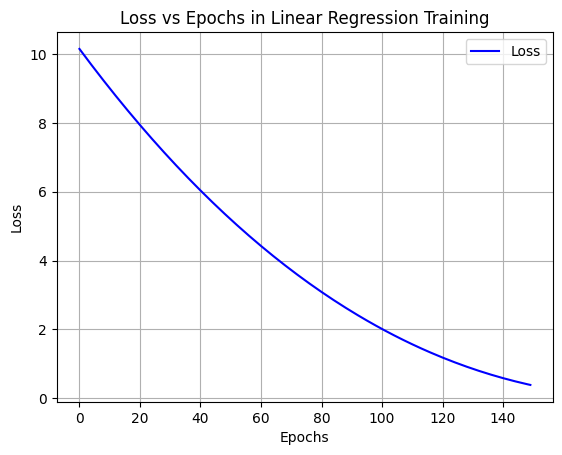

In [10]:
plt.plot(loss, label='Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs in Linear Regression Training')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
torch.save(model, 'Model.pth')